In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [123]:
csv_file_path = 'Original_Cancer_Data.csv'
df = pd.read_csv(csv_file_path)

C:\Users\NEW\AppData\Local\Temp\ipykernel_1364\296166722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='diagnosis',palette='RdBu_r')


<Axes: xlabel='diagnosis', ylabel='count'>

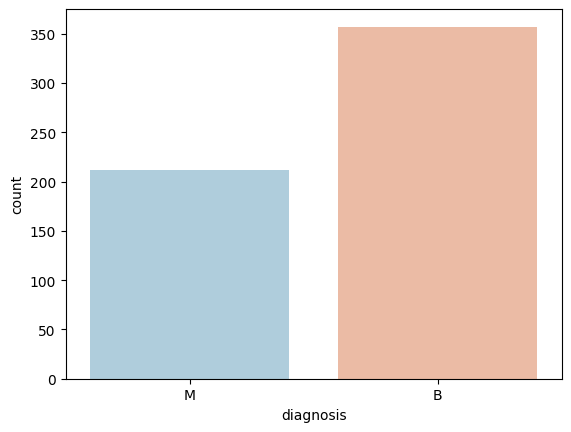

In [124]:
sns.countplot(df, x='diagnosis',palette='RdBu_r')

In [125]:
csv_file_path = 'Cancer_Data.csv'
df = pd.read_csv(csv_file_path)

In [126]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,88411702,B,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,...,26.34,98.00,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321,NaN
1,91903902,B,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,...,20.20,101.60,773.4,0.12640,0.1564,0.12060,0.08704,0.2806,0.07782,NaN
2,863031,B,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,29.26,85.51,521.7,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,NaN
3,912600,B,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,...,14.20,112.50,854.3,0.15410,0.2979,0.40040,0.14520,0.2557,0.08181,NaN
4,8810955,M,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,...,34.85,115.00,811.3,0.15590,0.4059,0.37440,0.17720,0.4724,0.10260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,8711002,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,...,20.50,97.67,677.3,0.14780,0.2256,0.30090,0.09722,0.3849,0.08633,NaN
2852,8812844,B,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,...,22.84,71.94,375.6,0.14060,0.1440,0.06572,0.05575,0.3055,0.08797,NaN
2853,9112366,B,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,...,38.81,86.04,527.8,0.14060,0.2031,0.29230,0.06835,0.2884,0.07220,NaN
2854,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902,NaN


In [127]:
df.shape

(2856, 33)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2856 non-null   int64  
 1   diagnosis                2856 non-null   object 
 2   radius_mean              2856 non-null   float64
 3   texture_mean             2856 non-null   float64
 4   perimeter_mean           2856 non-null   float64
 5   area_mean                2856 non-null   float64
 6   smoothness_mean          2856 non-null   float64
 7   compactness_mean         2856 non-null   float64
 8   concavity_mean           2856 non-null   float64
 9   concave points_mean      2856 non-null   float64
 10  symmetry_mean            2856 non-null   float64
 11  fractal_dimension_mean   2856 non-null   float64
 12  radius_se                2856 non-null   float64
 13  texture_se               2856 non-null   float64
 14  perimeter_se            

In [129]:
df.isnull().sum()

id                            0
diagnosis                     0
radius_mean                   0
texture_mean                  0
perimeter_mean                0
area_mean                     0
smoothness_mean               0
compactness_mean              0
concavity_mean                0
concave points_mean           0
symmetry_mean                 0
fractal_dimension_mean        0
radius_se                     0
texture_se                    0
perimeter_se                  0
area_se                       0
smoothness_se                 0
compactness_se                0
concavity_se                  0
concave points_se             0
symmetry_se                   0
fractal_dimension_se          0
radius_worst                  0
texture_worst                 0
perimeter_worst               0
area_worst                    0
smoothness_worst              0
compactness_worst             0
concavity_worst               0
concave points_worst          0
symmetry_worst                0
fractal_

In [130]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2856 non-null   int64  
 1   diagnosis                2856 non-null   object 
 2   radius_mean              2856 non-null   float64
 3   texture_mean             2856 non-null   float64
 4   perimeter_mean           2856 non-null   float64
 5   area_mean                2856 non-null   float64
 6   smoothness_mean          2856 non-null   float64
 7   compactness_mean         2856 non-null   float64
 8   concavity_mean           2856 non-null   float64
 9   concave points_mean      2856 non-null   float64
 10  symmetry_mean            2856 non-null   float64
 11  fractal_dimension_mean   2856 non-null   float64
 12  radius_se                2856 non-null   float64
 13  texture_se               2856 non-null   float64
 14  perimeter_se            

In [132]:
df.duplicated().sum()

2337

C:\Users\NEW\AppData\Local\Temp\ipykernel_1364\296166722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='diagnosis',palette='RdBu_r')


<Axes: xlabel='diagnosis', ylabel='count'>

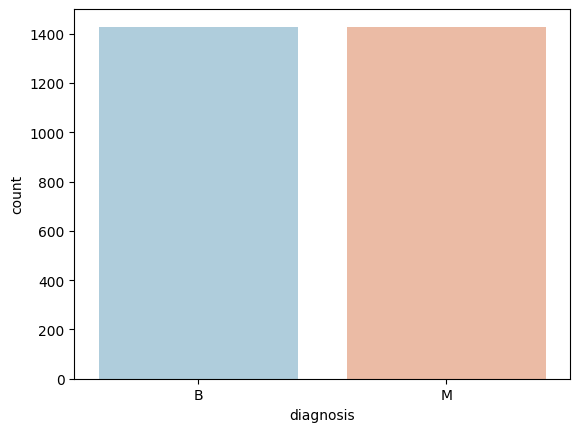

In [133]:
sns.countplot(df, x='diagnosis',palette='RdBu_r')

In [134]:
def performance(model,x_train,y_train,y_pred,y_test):
   
    print('Training Score:',model.score(x_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [135]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])
df['diagnosis'].unique()

array([0, 1])

In [136]:
from sklearn.model_selection import train_test_split
x=df.drop('diagnosis',axis=1)
y=df[['diagnosis']]

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [140]:
y_Pred = classifier.predict(x_test)

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_Pred)
show = pd.DataFrame(cm,columns=["yes","no"],index=["yes","no"])
show.head()


,yes,no
yes,413,7
no,12,425


In [142]:
from sklearn.metrics import accuracy_score
print("Accuracy=", accuracy_score(y_test, y_Pred))

Accuracy= 0.9778296382730455


In [143]:
performance(classifier,x_train,y_train,y_Pred,y_test)

Training Score: 0.9854927463731866
Testing Score: 0.9112836438923395
Other Metrics In Testing Data: 
MSE: 0.022170361726954493
MAE: 0.022170361726954493


In [144]:
lr = LinearRegression()
lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

In [145]:
performance(lr,x_train,y_train,lr_pred,y_test)

Training Score: 0.7760375151330732
Testing Score: 0.7469673755055289
Other Metrics In Testing Data: 
MSE: 0.06323326452853119
MAE: 0.19342856141841766


In [146]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train.values.ravel())

rf_pred = rf.predict(x_test)

performance(rf,x_train,y_train,rf_pred,y_test)

Training Score: 0.9997222410423975
Testing Score: 0.9989951705350333
Other Metrics In Testing Data: 
MSE: 0.0002511085180863477
MAE: 0.003407234539089848


In [147]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

performance(dt,x_train,y_train,dt_pred,y_test)

Training Score: 1.0
Testing Score: 1.0
Other Metrics In Testing Data: 
MSE: 0.0
MAE: 0.0


In [148]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only for polynomial kernel
}

grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5)
grid_search.fit(x_train, y_train.values.ravel())
best_svm = grid_search.best_estimator_

svm_pred = best_svm.predict(x_test)
performance(best_svm, x_train, y_train.values, svm_pred, y_test)

Training Score: 1.0
Testing Score: 1.0
Other Metrics In Testing Data: 
MSE: 0.0
MAE: 0.0


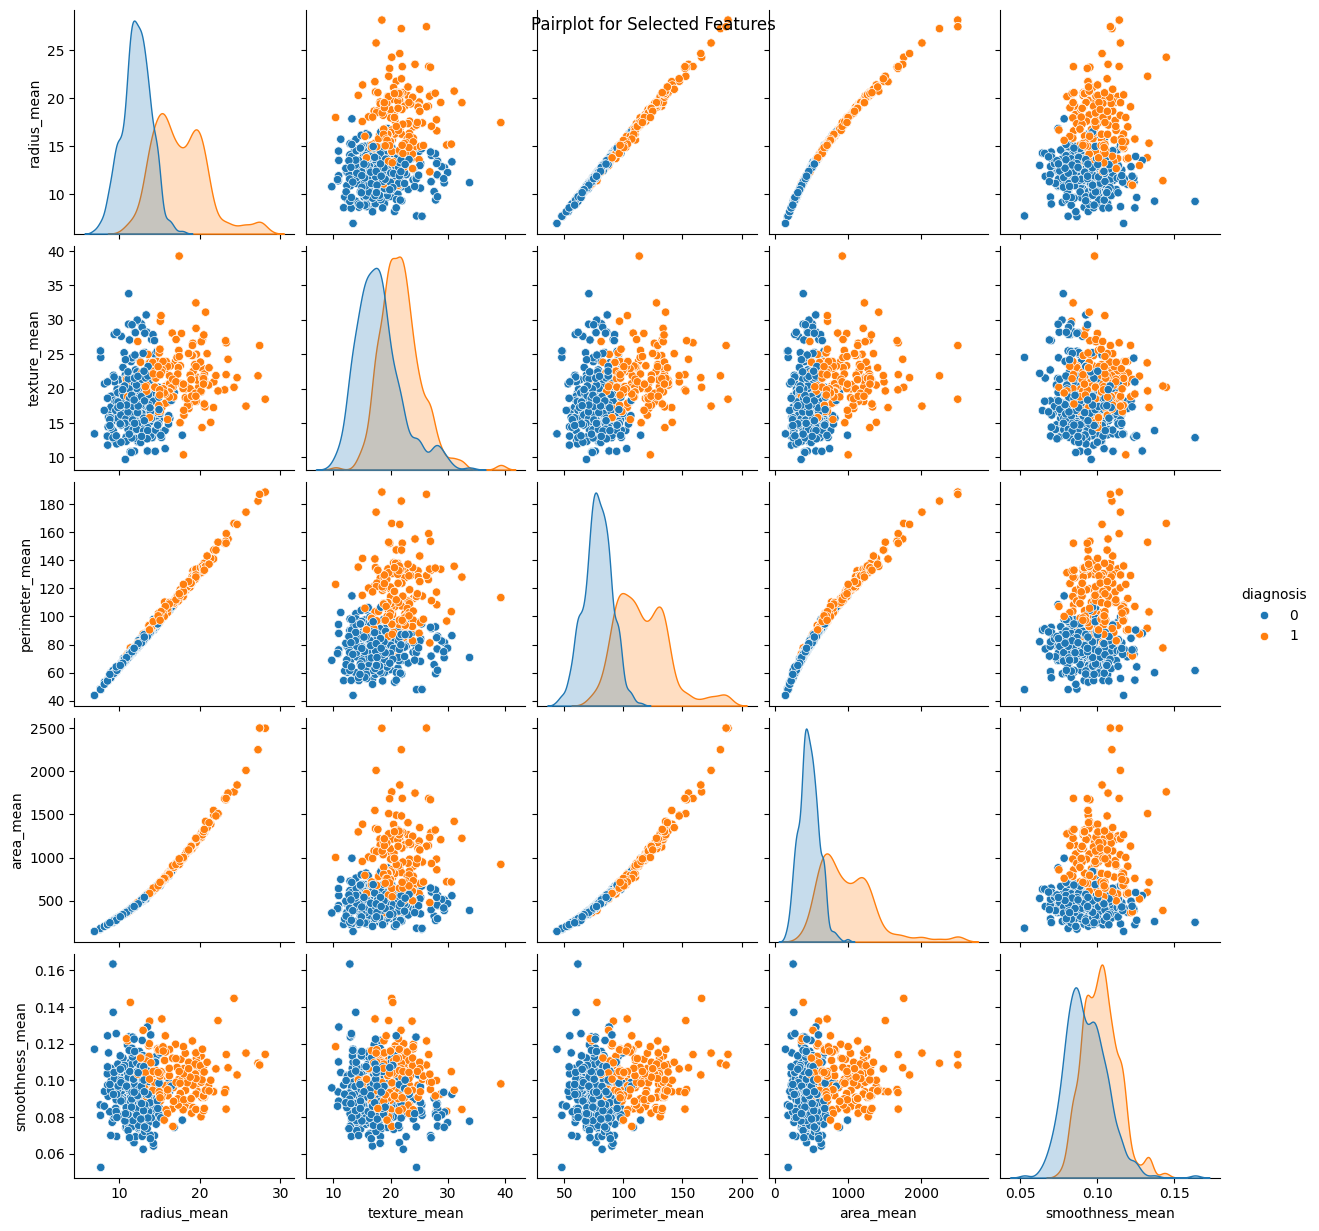

In [149]:
#0=Malignant; 1=Benign
selected_features = df.columns[2:7] 
sns.pairplot(data=df, hue='diagnosis', vars=selected_features, diag_kind='kde')
plt.suptitle("Pairplot for Selected Features")
plt.show()

C:\Users\NEW\AppData\Local\Temp\ipykernel_1364\3652048186.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette="coolwarm")


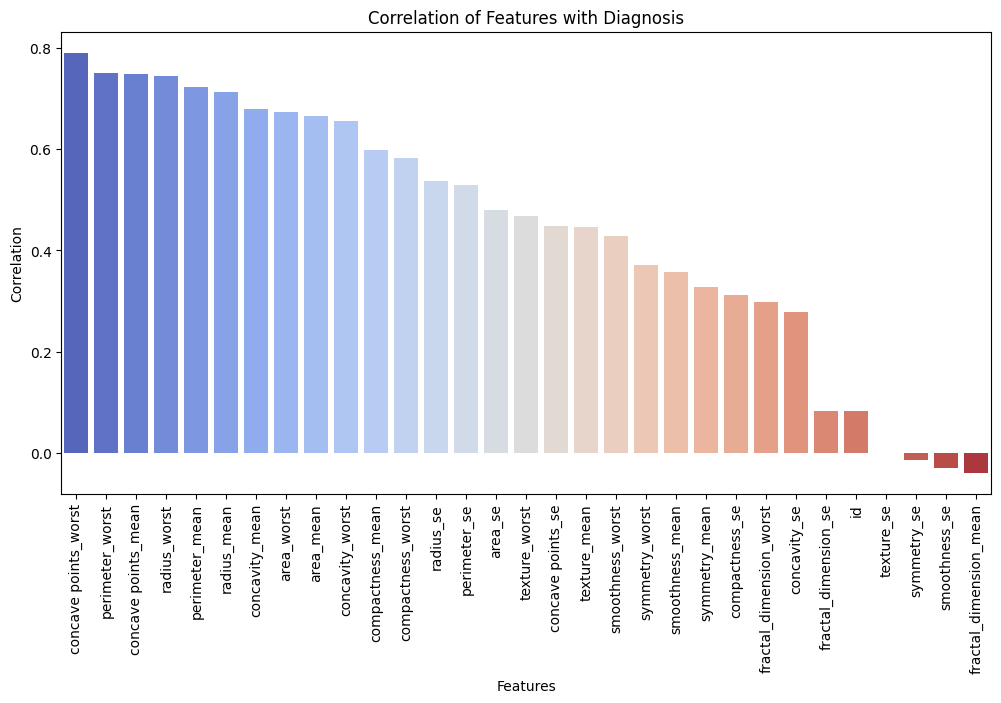

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Select the correlation of "diagnosis" with other features
correlation_with_diagnosis = correlation_matrix["diagnosis"].sort_values(ascending=False)

# Drop the "diagnosis" itself
correlation_with_diagnosis = correlation_with_diagnosis.drop("diagnosis")

# Create a bar chart of the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette="coolwarm")
plt.title("Correlation of Features with Diagnosis")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

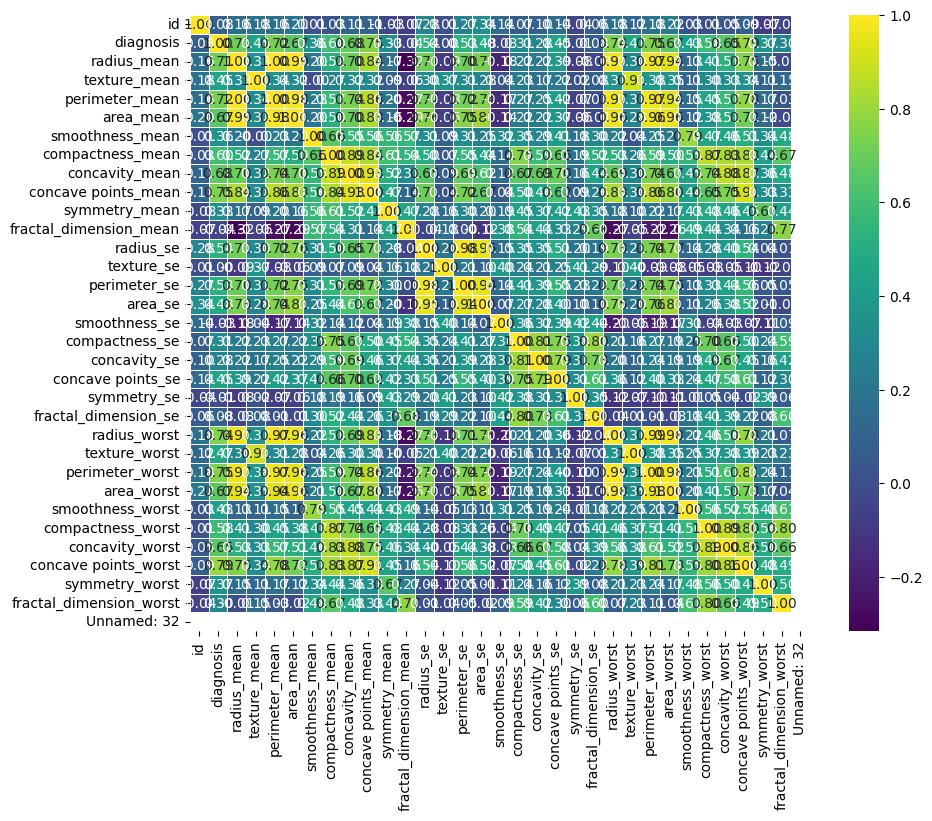

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

# Convert non-numeric values to numeric (replace 'B' and 'M' with appropriate values)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.show()


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)
X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 94.93%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop('texture_se', axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 93.88%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop(['texture_se', 'symmetry_se'], axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 93.88%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop(['texture_se', 'symmetry_se', 'smoothness_se'], axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 93.88%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop(['texture_se', 'symmetry_se', 'smoothness_se', 'fractal_dimension_mean'], axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 93.53%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop(['texture_se', 'symmetry_se', 'smoothness_se', 'fractal_dimension_mean', 'fractal_dimension_se'], axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 93.53%
SVM Accuracy: 90.56%
Decision Tree Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Cancer_Data.csv'  
df = pd.read_csv(csv_file_path)

df.drop(['texture_se', 'symmetry_se', 'smoothness_se', 'fractal_dimension_mean', 'fractal_dimension_se', 'id'], axis=1, inplace=True)

X = df.iloc[:, 2:]  
y = df.iloc[:, 1]   
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) 
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 20.28%
SVM Accuracy: 8.74%
Decision Tree Accuracy: 100.00%


In [160]:
import pandas as pd
from IPython.display import display, Markdown
data = {
    '{f}': [94.93, 90.56, 100, 100],
    '{f}-{texture_se}': [93.88, 90.56, 100, 100],
    '{f}-{texture_se,symmetry_se}': [93.88, 90.56, 100, 100],
    '{f}-{texture_se,symmetry_se, smoothness_se}': [93.88, 90.56, 100, 100],
    '{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean}': [93.53, 90.56, 100, 100],
    '{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean, fractal_dimension_se}': [93.53, 90.56, 100, 100],
    '{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean, fractal_dimension_se, id}': [20.28, 8.74, 100, 100]
}

index_labels = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
df = pd.DataFrame(data, index=index_labels)
heading = "# **Accuracy Table**"
display(Markdown(heading))
df


# **Accuracy Table**

,{f},{f}-{texture_se},"{f}-{texture_se,symmetry_se}","{f}-{texture_se,symmetry_se, smoothness_se}","{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean}","{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean, fractal_dimension_se}","{f}-{texture_se,symmetry_se, smoothness_se, fractal_dimension_mean, fractal_dimension_se, id}"
Logistic Regression,94.93,93.88,93.88,93.88,93.53,93.53,20.28
SVM,90.56,90.56,90.56,90.56,90.56,90.56,8.74
Decision Tree,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Random Forest,100.00,100.00,100.00,100.00,100.00,100.00,100.00
